# Analysing the Moneyball game using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


# Here: RA stands for runs allowed. RS stands for runs scored.OBP stands for On Base Pecentage.BA stands for batting average.OOBP stands for opponentsOBP.OSLG stands for oponents SLG. W stands for wins in that season. A new variable RD is added to as the difference between RS & RA.

Additionally we shall only keep the records of the Year<2002 in order to replicate the data prior to the 2002 season.We will use the plots in order to find the insights regarding the distributions of the numerical variable. 

In [3]:
len(df)

1232

In [4]:
len(df.columns)

15

In [5]:
df.info

<bound method DataFrame.info of      Team League  Year   RS   RA    W    OBP    SLG     BA  Playoffs  \
0     ARI     NL  2012  734  688   81  0.328  0.418  0.259         0   
1     ATL     NL  2012  700  600   94  0.320  0.389  0.247         1   
2     BAL     AL  2012  712  705   93  0.311  0.417  0.247         1   
3     BOS     AL  2012  734  806   69  0.315  0.415  0.260         0   
4     CHC     NL  2012  613  759   61  0.302  0.378  0.240         0   
5     CHW     AL  2012  748  676   85  0.318  0.422  0.255         0   
6     CIN     NL  2012  669  588   97  0.315  0.411  0.251         1   
7     CLE     AL  2012  667  845   68  0.324  0.381  0.251         0   
8     COL     NL  2012  758  890   64  0.330  0.436  0.274         0   
9     DET     AL  2012  726  670   88  0.335  0.422  0.268         1   
10    HOU     NL  2012  583  794   55  0.302  0.371  0.236         0   
11    KCR     AL  2012  676  746   72  0.317  0.400  0.265         0   
12    LAA     AL  2012  767  699

In [28]:
moneyball=df.loc[df['Year']<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [29]:
df.loc[:,'RD']=df.RS-df.RA
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


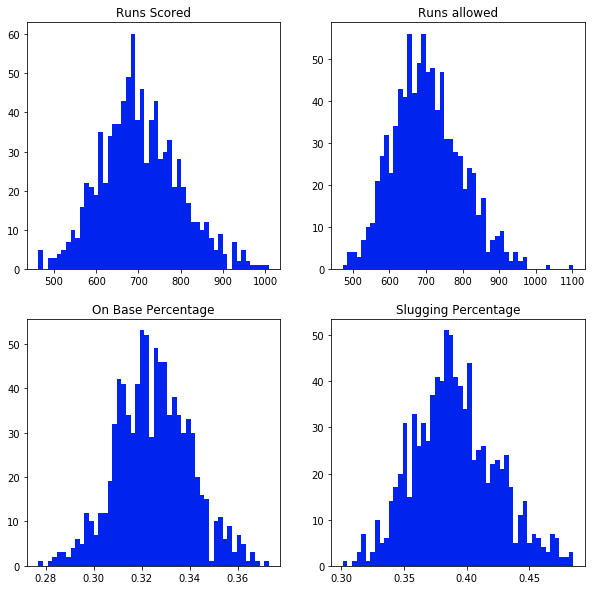

In [30]:
f, ax=plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins=50)
ax[0,0].set_title('Runs Scored')
ax[0,1].hist(moneyball.RA,bins=50)
ax[0,1].set_title('Runs allowed')
ax[1,0].hist(moneyball.OBP,bins=50)
ax[1,0].set_title('On Base Percentage')
ax[1,1].hist(moneyball.SLG,bins=50)
ax[1,1].set_title('Slugging Percentage')
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

# Observe that all 4 features(vaiables) are approximately normally distributed.Both the runs scored and runs allowed graph seems to be skewed slightly towards left. The tails of runs scored graph seems to be thicker than that of the runs allowed graph

In [31]:
import seaborn as sb
sb.get_dataset_names()

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

<function matplotlib.pyplot.show(*args, **kw)>

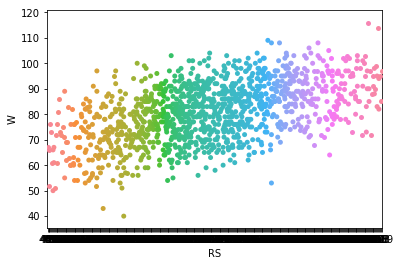

In [32]:
#SWARMPLOT
sb.swarmplot(x="RS",y="W",data=df)
plt.show

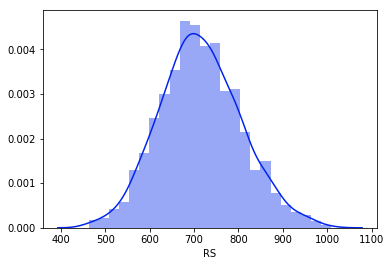

In [33]:
#Distplot
sb.distplot(df['RS'])
sb.set_palette("winter")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

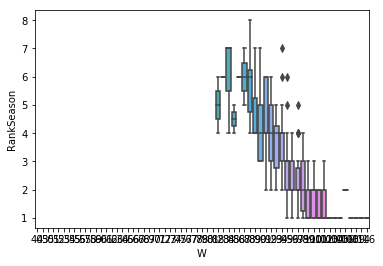

In [34]:
#BOXPLOT
sb.boxplot(x="W",y="RankSeason",data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

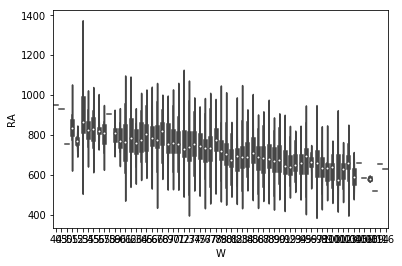

In [35]:
#violinplot

sb.violinplot(x="W",y="RA",data=df)
plt.show

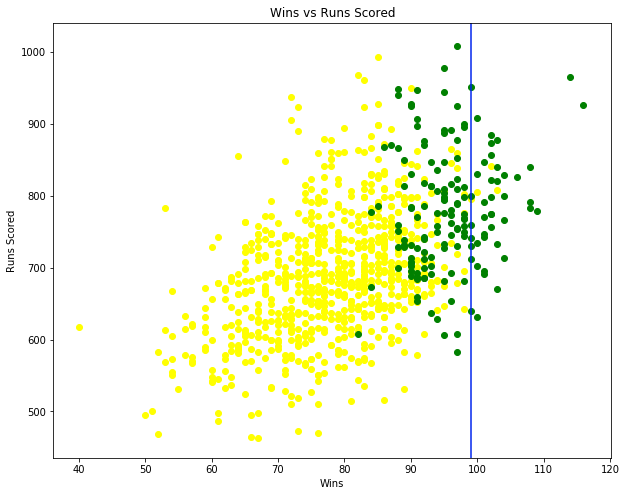

In [36]:
#Subsetting teams qualified for playoffs
moneyball1=moneyball.loc[moneyball['Playoffs']==1]
moneyball0=moneyball.loc[moneyball['Playoffs']==0]
#Plotting Scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y=moneyball0.RS,c='yellow')
plt.scatter(x=moneyball1.W,y=moneyball1.RS,c='green')
plt.title('Wins vs Runs Scored')
plt.xlabel('Wins')
plt.ylabel('Runs Scored')
plt.axvline(x=99)


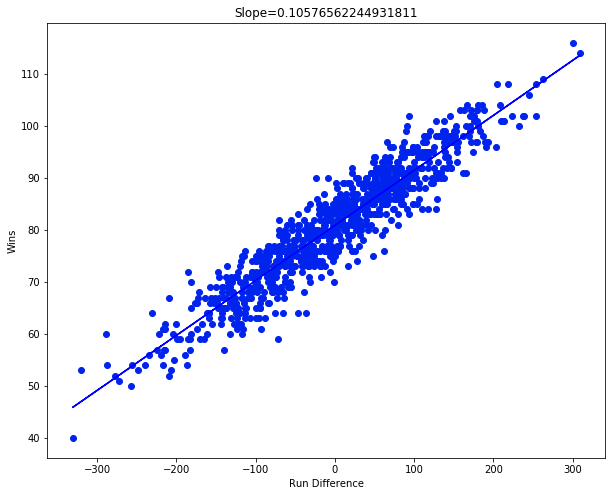

In [38]:
x=np.array(moneyball.RD)
y=np.array(moneyball.W)
#Deriving slope and intercept values
slope,intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,abline_values,'b')
plt.title('Slope=%s'%(slope))
plt.xlabel('Run Difference')
plt.ylabel('Wins')
plt.show()

In [39]:
print(np.corrcoef(x,y))

[[1.         0.93851498]
 [0.93851498 1.        ]]


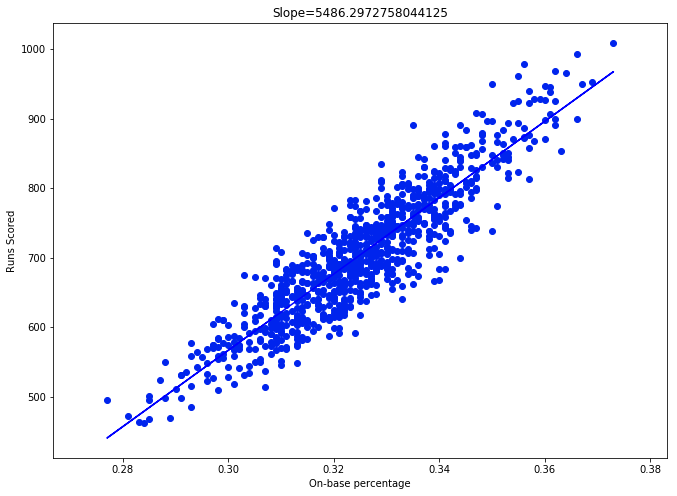

In [48]:
x=np.array(moneyball.OBP)
y=np.array(moneyball.RS)
#Deriving slope and intercept values
slope,intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
#Plotting the figure
plt.figure(figsize=(11,8))
plt.scatter(x,y)
plt.plot(x,abline_values,'b')
plt.title('Slope=%s'%(slope))
plt.xlabel('On-base percentage')
plt.ylabel('Runs Scored')
plt.show()

In [41]:
print(np.corrcoef(x,y))

[[1.         0.90490915]
 [0.90490915 1.        ]]


In [45]:
moneyball.isnull().sum()
moneyball.drop(['RankSeason','RankPlayoffs'],axis=1,inplace=True)

C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [46]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


In [47]:
moneyballnew=moneyball.dropna()
moneyballnew.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
x=moneyball[['OBP','SLG']].values
y=moneyball[['RS']].values
#Calling our model objects
RS_model=LinearRegression()
#Fitting the model
RS_model.fit(x,y)
#Printing the model intercept and coefficients
print(RS_model.intercept_)
print(RS_model.coef_)
RS_model.predict([[0.339,0.430]])

[-804.62706106]
[[2737.76802227 1584.90860546]]


array([[804.98699884]])